## Laboratuvar: Keşifsel Veri Analizi
Tahmini süre: 30 dakika

Bu laboratuvarda, temizlenmiş bir veri kümesiyle Keşifsel Veri Analizi (EDA) yapacaksınız.

Hedefler
Bu laboratuvarda şunları yapacaksınız:

Veri kümesinin yapısını incelemek.

Eksik değerleri etkili bir şekilde ele almak.

Anahtar sütunlar üzerinde özet istatistikler yapmak.

İstihdam durumu, iş memnuniyeti, programlama dili kullanımı ve uzaktan çalışma trendlerini analiz etmek.

## Uygulamalı Laboratuvar Çalışması
Adım 1: Kütüphaneleri Kurma ve İçe Aktarma
Veri işleme ve görselleştirme için gerekli kütüphaneleri kurun.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 175.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 147.9 MB/s eta 0:00:00


## Adım 2: Veri Setini Yükleyin ve Önizleyin
Veri setini verilen URL'den yükleyin. Yapının genel bir görünümünü elde etmek için df.head() kullanarak ilk birkaç satırı görüntüleyin.

In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

# 3. Adım: Eksik Verilerin Yönetimi
İstihdam, İş Durumu ve Uzaktan Çalışma gibi kritik sütunlardaki eksik değerleri belirleyin ve yönetin. Eksik verilerin önemine bağlı olarak bu değerleri doldurmak veya silmek için bir strateji uygulayın.

In [3]:
# 1. Kritik sütunlardaki eksiklikleri kontrol edelim
critical_columns = ['Employment', 'JobSat', 'RemoteWork', 'ConvertedCompYearly']
print("İşlem Öncesi Eksik Değerler:")
print(df[critical_columns].isnull().sum())

# 2. Strateji Uygulama:

# Kategorik Sütunlar (En sık geçen değerle -Mod- doldurma)
for col in ['Employment', 'JobSat', 'RemoteWork']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Sayısal Sütunlar (Aykırı değerlerden etkilenmemek için -Medyan- ile doldurma)
median_salary = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_salary)

# 3. Sonuç Kontrolü
print("\nİşlem Sonrası Eksik Değerler:")
print(df[critical_columns].isnull().sum())

İşlem Öncesi Eksik Değerler:
Employment                 0
JobSat                 36311
RemoteWork             10631
ConvertedCompYearly    42002
dtype: int64

İşlem Sonrası Eksik Değerler:
Employment             0
JobSat                 0
RemoteWork             0
ConvertedCompYearly    0
dtype: int64


## 4. Adım: Deneyim ve İş Memnuniyetinin Analizi
Profesyonel kodlama deneyimi yılları (YearsCodePro) ile iş memnuniyeti (JobSat) arasındaki ilişkiyi analiz edin. YearsCodePro'yu özetleyin ve deneyim aralıklarına göre medyan memnuniyet puanlarını hesaplayın.

-YearsCodePro için deneyim aralıkları oluşturun (örneğin, 0-5, 5-10, 10-20, >20 yıl).

-Her aralık için medyan JobSat'ı hesaplayın.

-İlişkiyi bir çubuk grafik veya benzer bir görselleştirme kullanarak görselleştirin.

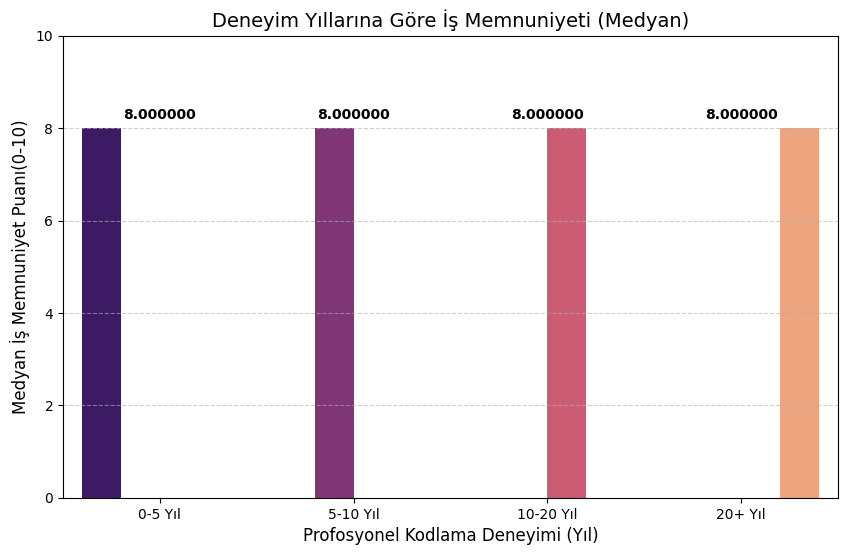

### Gruplandırılmış Sonuçlar ###
  ExperienceRange  JobSat
0         0-5 Yıl     8.0
1        5-10 Yıl     8.0
2       10-20 Yıl     8.0
3         20+ Yıl     8.0


In [4]:
# 1. YearsCodePro'yu sayıya çevirelim (Metinleri NaN yapıp 0 ile doldurur)
df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)

# 2. Deneyim Aralıklarını Oluşturalım
#  veride 0'dan 50'ye kadar değerler var, aralıkları buna göre kesiyoruz
bins = [0, 5, 10, 20, 100]
labels = ['0-5 Yıl','5-10 Yıl', '10-20 Yıl', '20+ Yıl']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_Numeric'], bins=bins, labels=labels, include_lowest=True)

# 3. Deneyim Gruplarına göre JobSat'ın MEDYANINI hesaplayalım
# (JobSat zaten sayısal olduğu için doğrudan median alıyoruz)
experience_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median().reset_index()

# 4. Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=experience_sat, hue='ExperienceRange', palette='magma', legend=False)

plt.title('Deneyim Yıllarına Göre İş Memnuniyeti (Medyan)', fontsize = 14)
plt.xlabel('Profosyonel Kodlama Deneyimi (Yıl)', fontsize = 12)
plt.ylabel('Medyan İş Memnuniyet Puanı(0-10)', fontsize= 12)
plt.ylim(0,10)     #0-10 skalasını tam görelim
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Sütunların üzerine tam medyan değerlerini yazalım
for i, val in enumerate(experience_sat['JobSat']):
    plt.text(i, val  + 0.2, f'{val:1f}', ha='center', fontweight='bold')

plt.show()    
print("### Gruplandırılmış Sonuçlar ###")
print(experience_sat)


## Adım 5: İş Memnuniyetini Görselleştirme
İş memnuniyeti değerlerinin dağılımını göstermek için bir sayım grafiği kullanın. Bu, katılımcıların genel memnuniyet düzeyleri hakkında fikir verir.

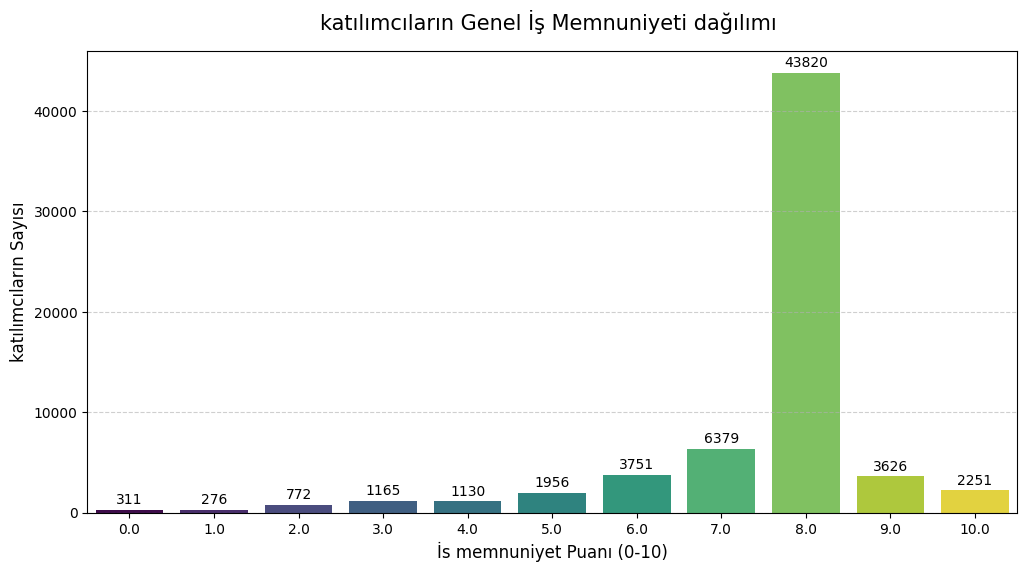

In [5]:
# 1. Grafik boyutunu ayarlayalım
plt.figure(figsize=(12,6))

# 2. Count Plot oluşturalım
# JobSat sütunundaki her bir puanın (0-10) kaç kez geçtiğini sayar
sns.countplot(data=df, x='JobSat', palette='viridis', hue = 'JobSat', legend=False)

# 3. Grafik detaylarını ekleyelim
plt.title('katılımcıların Genel İş Memnuniyeti dağılımı ',  fontsize=15, pad=15)
plt.xlabel('İs memnuniyet Puanı (0-10)', fontsize= 12)
plt.ylabel('katılımcıların Sayısı', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 4. Sütunların üzerine tam sayıları yazdıralım 
ax = plt.gca()   #Üzerinde çalıştığımız şu anki grafiğin koordinat sistemini bana ver ki, ben de onun üzerine yazı yazabileyim.
for p in ax.patches:  #Grafikteki her bir sütuna (bara) matplotlib dünyasında "patch" denir.
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),  #7 birim yukarı kaydır demektir. Böylece yazı sütuna değmez, üzerinde "uçuyor" gibi görünür.
                textcoords='offset points')  #Yukarıdaki 7 birimi piksel/nokta cinsinden hesapla" demektir.

plt.show()

## 6. Adım: İş Rolüne Göre Uzaktan Çalışma Tercihlerinin Analizi
İş rollerine göre uzaktan çalışma eğilimlerini analiz edin. Tercihleri ​​incelemek ve belirli iş rollerinin uzaktan çalışmayı diğerlerinden daha çok tercih edip etmediğini araştırmak için Uzaktan Çalışma ve İstihdam sütunlarını kullanın.

Uzaktan çalışma dağılımını göstermek için bir sayım grafiği kullanın.

Uzaktan çalışma tercihlerini istihdam türüne (örneğin, tam zamanlı, yarı zamanlı) ve iş rollerine göre çapraz tablo haline getirin.

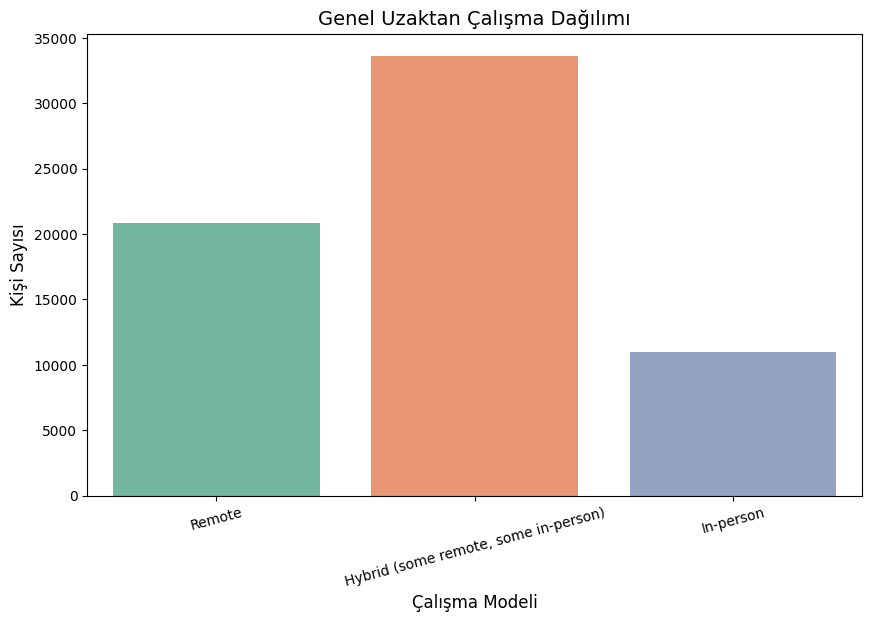

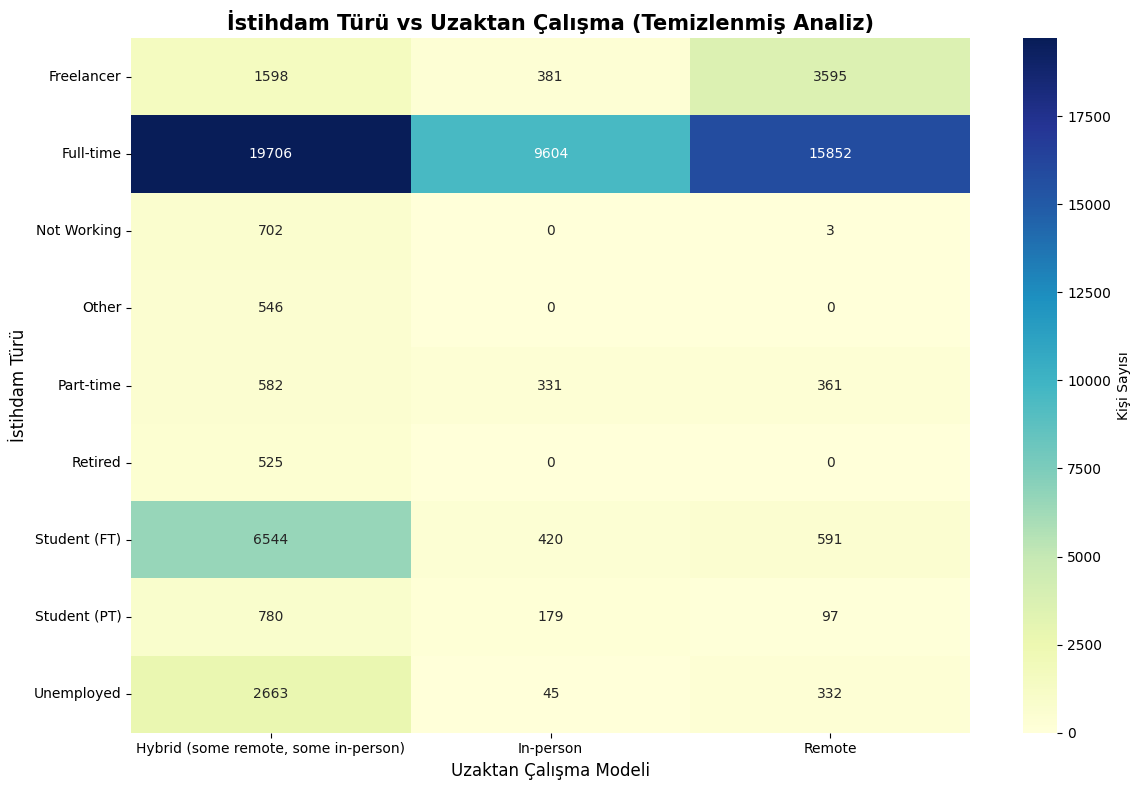

In [14]:
# 1. Uzaktan Çalışma Dağılımını Gösteren Sayım Grafiği (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', hue='RemoteWork', palette='Set2', legend=False)
plt.title('Genel Uzaktan Çalışma Dağılımı', fontsize=14)
plt.xlabel('Çalışma Modeli', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=15) # Yazılar birbirine girmesin diye hafif eğelim
plt.show()

# 2. İstihdam Türü ve Uzaktan Çalışma Tercihlerini Çapraz Tablo (Crosstab) Haline Getirme
# Bu işlem bize hangi istihdam türünde kaç kişinin hangi modelle çalıştığını sayısal gösterir
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Employment sütununu sadeleştirelim
# Önce noktalı virgülle ayrılmış olanların ilkini alıyoruz, sonra sözlükle kısaltıyoruz
def simplify_employment(text):
    if pd.isna(text): return "Unknown"
    first_part = text.split(';')[0]
    
    mapping = {
        'Employed, full-time': 'Full-time',
        'Independent contractor, freelancer, or self-employed': 'Freelancer',
        'Employed, part-time': 'Part-time',
        'Student, full-time': 'Student (FT)',
        'Student, part-time': 'Student (PT)',
        'Not employed, but looking for work': 'Unemployed',
        'Not employed, and not looking for work': 'Not Working',
        'Retired': 'Retired',
        'I prefer not to say': 'Other'
    }
    return mapping.get(first_part, "Other")

df['Employment_Clean'] = df['Employment'].apply(simplify_employment)

# 2. Çapraz Tablo (Yeni temizlenmiş sütunla)
cross_tab_clean = pd.crosstab(df['Employment_Clean'], df['RemoteWork'])

# 3. Görselleştirme (Isı Haritası)


plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_clean, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Kişi Sayısı'})

plt.title('İstihdam Türü vs Uzaktan Çalışma (Temizlenmiş Analiz)', fontsize=15, fontweight='bold')
plt.xlabel('Uzaktan Çalışma Modeli', fontsize=12)
plt.ylabel('İstihdam Türü', fontsize=12)
plt.xticks(rotation=0) # Yazılar artık kısa olduğu için dik yapmaya gerek yok
plt.tight_layout()
plt.show()

# 7. Adım: Bölgelere Göre Programlama Dili Trendlerinin Analizi
Programlama dillerinin bölgelere göre popülerliğini analiz edin. Hangi dillerin farklı bölgelerde en çok kullanıldığını araştırmak için LanguageHaveWorkedWith sütununu kullanın.

-Verileri ülke veya bölgeye göre filtreleyin.

-Bölgelere göre en popüler programlama dillerini çubuk grafik veya ısı haritası ile görselleştirin.

                      Country                 Language  Count
0                     Germany                      Ada     26
1                     Germany                     Apex     25
2                     Germany                 Assembly    324
3                     Germany  Bash/Shell (all shells)   1970
4                     Germany                        C   1147
..                        ...                      ...    ...
240  United States of America               TypeScript   4173
241  United States of America                      VBA    447
242  United States of America      Visual Basic (.Net)    511
243  United States of America                   Zephyr     35
244  United States of America                      Zig    160

[245 rows x 3 columns]
-----*********------------


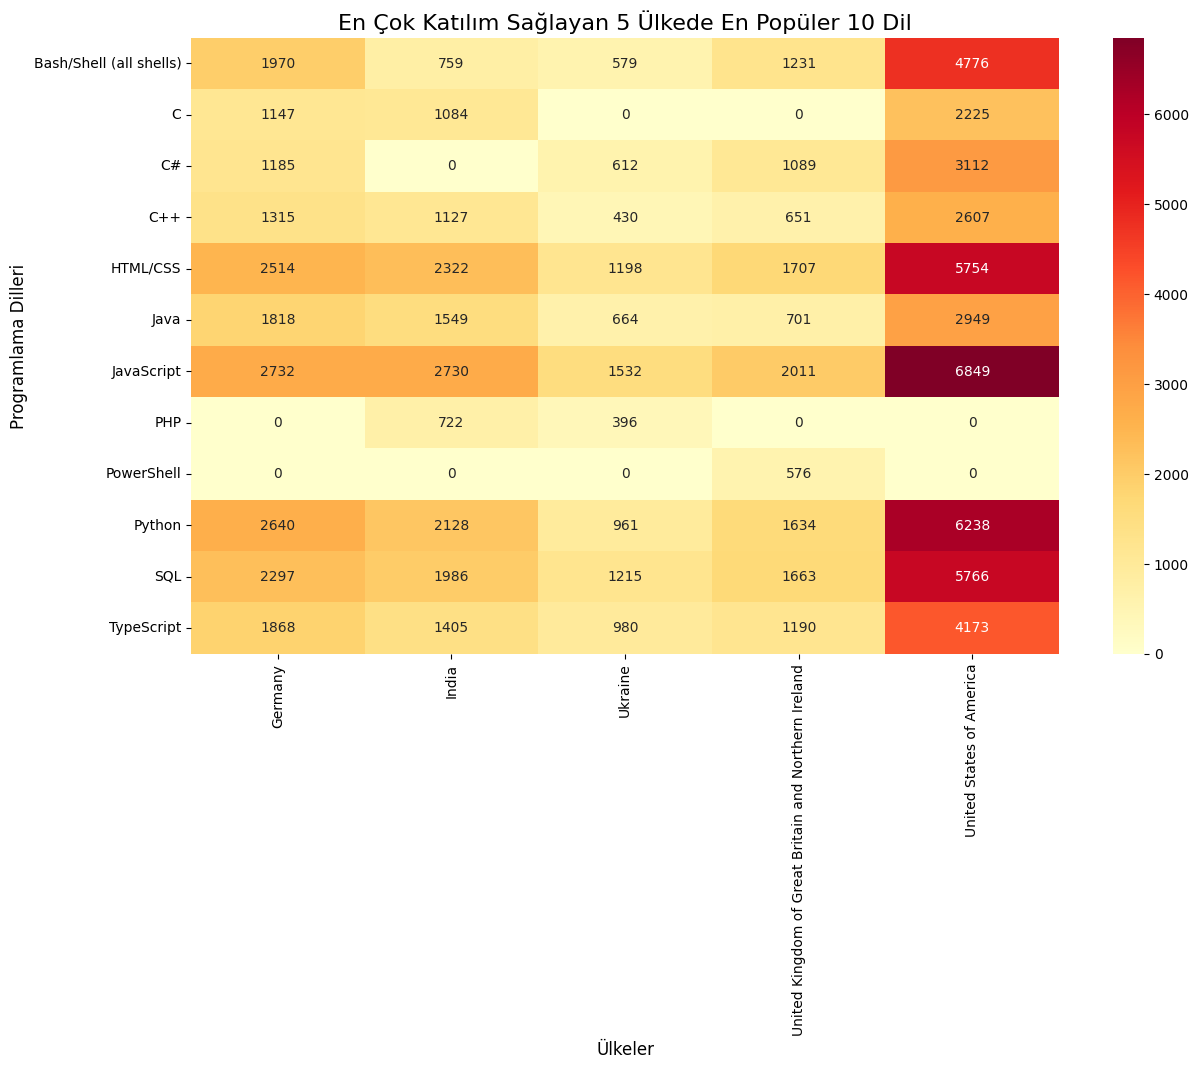

In [7]:
# 1. Analiz için gerekli sütunları seçelim ve boş değerleri atalım  Çünkü boş veriyle analiz yapamayız.
lang_df = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# 2. En çok katılımcısı olan ilk 5 ülkeyi belirleyelim 
top_countries = lang_df['Country'].value_counts().index[:5]  #v,Çünkü boş veriyle analiz yapamayız.
lang_df = lang_df[lang_df['Country'].isin(top_countries)]  #country sutununu 5 ülkeyle sınırlandırıyoruz. Diğerlerini "Şimdilik analiz dışı bırak" diyoruz.

# 3. Dilleri ayırıp her satırı bir dil-ülke çiftine dönüştürelim (Explode işlemi)
lang_df['Language'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_exploded = lang_df.explode('Language')  #1. satır: 1 kişi | ABD | Python 2. satır: 1 kişi | ABD | Java

# 4. Ülke ve Dil bazında sayıları hesaplayalım
top_langs_by_country = lang_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')  #"Bana her ülkede, her dilin kaç kez geçtiğini grupla" diyoruz.
print(top_langs_by_country)
print('-----*********------------')

# 5. Her ülke için en popüler ilk 10 dili filtreleyelim
# (Groupby'dan sonra her grup içinde en büyük 10'u alır)
top_10_per_country = top_langs_by_country.groupby('Country').apply(lambda x: x.nlargest(10, 'Count'), include_groups=False).reset_index()  #Count" sütununa bak ve her ülke için en büyük (en popüler) 10 dili seç.

# 6. Görselleştirme: Isı Haritası (Heatmap)
pivot_table = top_10_per_country.pivot(index='Language', columns='Country', values='Count').fillna(0)   #pivot: Bu, tablonun şeklini değiştirir. Dilleri satırlara, ülkeleri sütunlara, sayıları ise tam ortadaki hücrelere yerleştirir. Artık bir "Matris" elde ettik.

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd')  #Yellow-Orange-Red" (Sarıdan Kırmızıya). Sayı ne kadar büyükse kutu o kadar koyu kırmızı olur.
plt.title('En Çok Katılım Sağlayan 5 Ülkede En Popüler 10 Dil', fontsize=16)
plt.xlabel('Ülkeler', fontsize=12)
plt.ylabel('Programlama Dilleri', fontsize=12)
plt.show()

"""Birbirine yapışık halde duran binlerce dil verisini tek tek ayırdık, en büyük 5 ülkeye göre grupladık, ilk 10 dillerini bulduk ve hangi dil hangi ülkede ne kadar popüler "renklerle" gösterdik.
"""

# Adım 8: Deneyim ve Memnuniyet Arasındaki Korelasyon
Deneyim yıllarının (YearsCodePro) iş memnuniyeti (JobSatPoints_1) ile nasıl korelasyon gösterdiğini inceleyin. Bu ilişkiyi görselleştirmek için bir dağılım grafiği kullanın.

In [8]:
## Write your code here

Deneyim ve Memnuniyet Arasındaki Korelasyon katsayısı:  0.075235


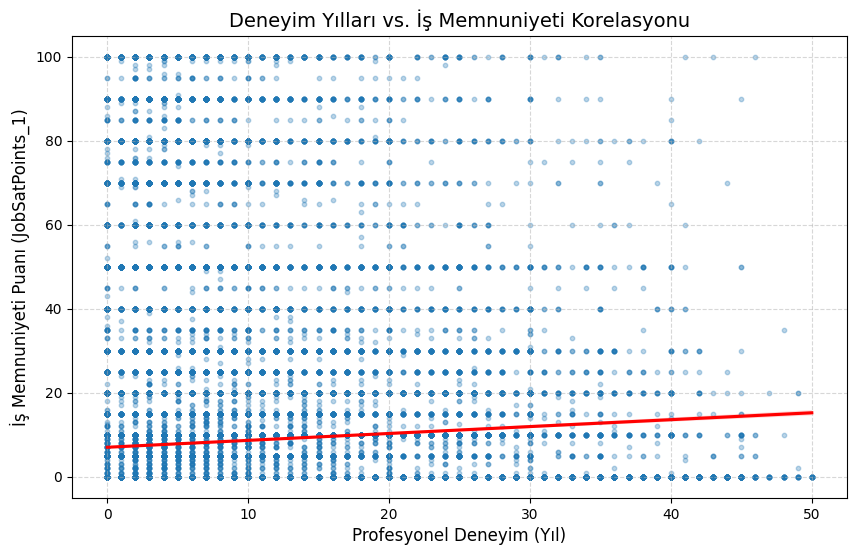

In [9]:
# 1. Veriyi temizleyelim ve sayısal olduklarından emin olalım
df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce').fillna(0)

# 2. Korelasyon katsayısını (Pearson) hesaplayalım
correlation = df['YearsCodePro_Numeric'].corr(df['JobSatPoints_1'])
print(f"Deneyim ve Memnuniyet Arasındaki Korelasyon katsayısı: {correlation: 4f}")

# 3. Görselleştirme: Dağılım Grafiği (Scatter Plot) + Regresyon Hattı
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='YearsCodePro_Numeric', y='JobSatPoints_1', 
           scatter_kws={'alpha': 0.3, 's':10}, line_kws={'color':'red'})  #scatter_kws={'alpha':0.3}: Binlerce nokta üst üste binip kararmasın diye noktaları şeffaflaştırır.

plt.title('Deneyim Yılları vs. İş Memnuniyeti Korelasyonu', fontsize=14)
plt.xlabel('Profesyonel Deneyim (Yıl)', fontsize=12)
plt.ylabel('İş Memnuniyeti Puanı (JobSatPoints_1)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 9. Adım: Eğitim Geçmişi ve İstihdam Türü
##Eğitim seviyesi kariyer yolunu nasıl şekillendiriyor?" sorusuna yanıt arıyoruz
-Eğitim geçmişinin (EdLevel) istihdam türüyle (Employment) nasıl ilişkili olduğunu inceleyin. 
-Yüksek öğrenimin belirli istihdam türleriyle ilişkili olup olmadığını anlamak için çapraz tablolar ve görselleştirmeler kullanın.

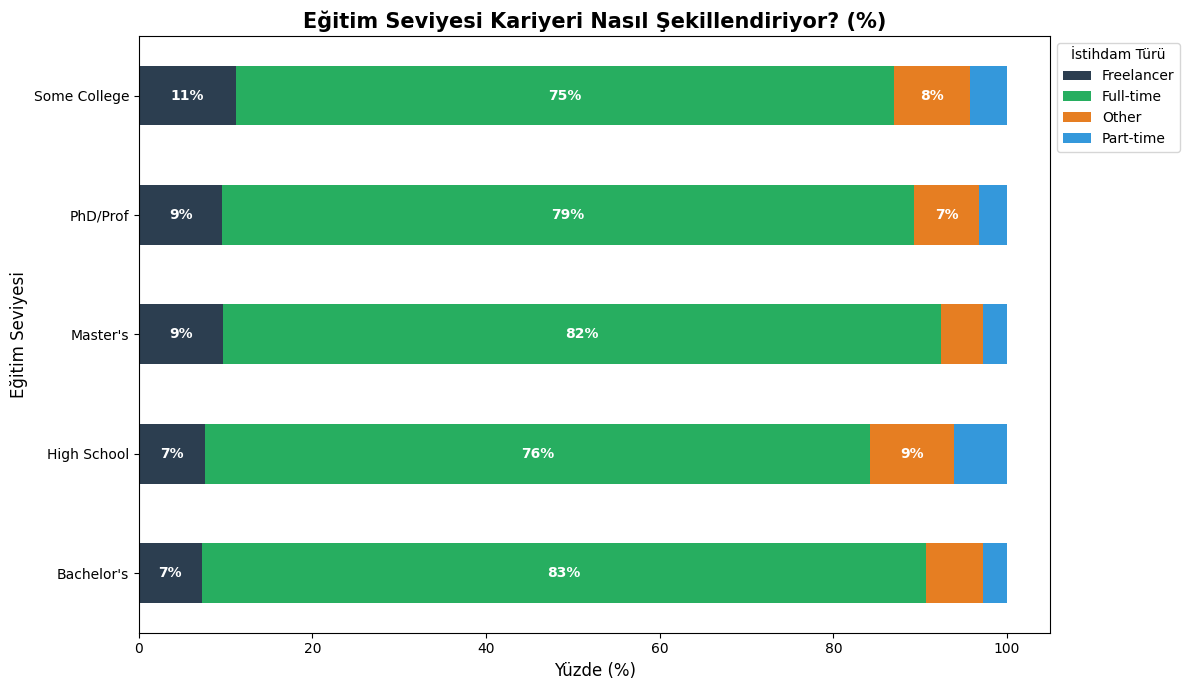

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. VERİ TEMİZLEME: Uzun metinleri analiz edilebilir kısa isimlere çevirelim
def clean_ed(text):
    if pd.isna(text): return "Other"
    if "Bachelor" in text: return "Bachelor's"
    if "Master" in text: return "Master's"
    if "Professional degree" in text: return "PhD/Prof"
    if "Secondary school" in text: return "High School"
    if "Some college" in text: return "Some College"
    return "Other"

def clean_emp(text):
    if pd.isna(text): return "Other"
    first = text.split(';')[0]
    if "full-time" in first: return "Full-time"
    if "Independent" in first: return "Freelancer"
    if "part-time" in first: return "Part-time"
    if "Student" in first: return "Student"
    return "Other"

df_edu = df.copy()
df_edu['EdShort'] = df_edu['EdLevel'].apply(clean_ed)
df_edu['EmpShort'] = df_edu['Employment'].apply(clean_emp)

# 2. ÇAPRAZ TABLO: Yüzdesel dağılım
# Sadece ana eğitim seviyelerine odaklanalım (Other'ı dışarıda bırakabiliriz)
main_edu = ["Bachelor's", "Master's", "PhD/Prof", "Some College", "High School"]
ed_emp_ct = pd.crosstab(df_edu[df_edu['EdShort'].isin(main_edu)]['EdShort'], 
                        df_edu['EmpShort'], normalize='index') * 100

# 3. GÖRSELLEŞTİRME: Yığılmış Çubuk Grafik


ax = ed_emp_ct.plot(kind='barh', stacked=True, figsize=(12, 7), 
                    color=['#2c3e50', '#27ae60', '#e67e22', '#3498db', '#95a5a6'])

plt.title('Eğitim Seviyesi Kariyeri Nasıl Şekillendiriyor? (%)', fontsize=15, fontweight='bold')
plt.xlabel('Yüzde (%)', fontsize=12)
plt.ylabel('Eğitim Seviyesi', fontsize=12)
plt.legend(title='İstihdam Türü', bbox_to_anchor=(1.0, 1.0))

# Yüzde değerlerini çubukların üzerine yazalım
for n, x in enumerate(ed_emp_ct.index):
    cum_sum = 0
    for col in ed_emp_ct.columns:
        value = ed_emp_ct.loc[x, col]
        if value > 7: # Sadece %7'den büyük alanlara yazı yaz
            plt.text(cum_sum + (value / 2), n, f'{int(value)}%', 
                     va='center', ha='center', color='white', fontweight='bold')
        cum_sum += value

plt.tight_layout()
plt.show()

In [17]:
"""
Eksik Veriler ✅
İş Memnuniyeti Dağılımı ✅
Deneyim vs Memnuniyet ✅
Uzaktan Çalışma Tercihleri ✅
Bölgesel Dil Trendleri ✅
Eğitim vs İstihdam ✅
"""

'\nEksik Veriler ✅\nİş Memnuniyeti Dağılımı ✅\nDeneyim vs Memnuniyet ✅\nUzaktan Çalışma Tercihleri ✅\nBölgesel Dil Trendleri ✅\nEğitim vs İstihdam ✅\n'

# Adım 10: Temizlenmiş ve Analiz Edilmiş Veri Setini Kaydedin
Analiz işleminizin ardından, değiştirilmiş veri setini daha sonra kullanmak veya paylaşmak üzere kaydedin.


In [18]:
# 1. Veri setini 'cleaned_survey_data_v12.csv' adıyla kaydedelim
# index=False parametresi çok önemlidir; pandas'ın kendi satır numaralarını 
# fazladan bir sütun olarak eklemesini engeller.

df.to_csv('cleaned_survey_data_v12.csv', index=False)

print("### İşlem Başarılı! ###")
print("Temizlenmiş ve analiz edilmiş veri seti 'cleaned_survey_data_v12.csv' adıyla kaydedildi.")

# 2. Kaydedilen dosyanın boyutunu kontrol edelim 
import os
file_size = os.path.getsize('cleaned_survey_data_v12.csv') / (1024 * 1024)
print(f"Dosya Boyutu: {file_size:.2f} MB")


### İşlem Başarılı! ###
Temizlenmiş ve analiz edilmiş veri seti 'cleaned_survey_data_v12.csv' adıyla kaydedildi.
Dosya Boyutu: 150.01 MB


In [19]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,YearsCodePro_Numeric,ExperienceRange,Employment_Clean
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,8.0,0.0,0-5 Yıl,Full-time
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Ind